# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [6]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

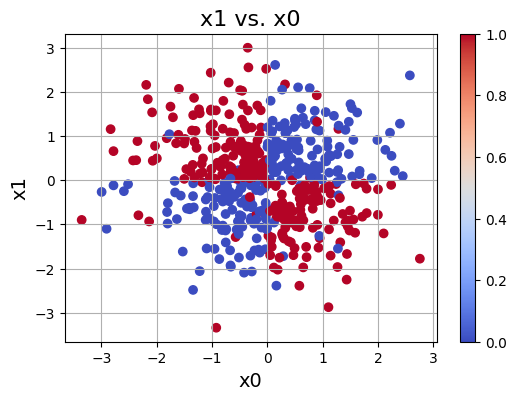

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [8]:
X_train = train[["x0", "x1"]]
y_train = train["y"]
X_test = test[["x0", "x1"]]
y_test = test["y"]

In [9]:
class CosineScheduler:
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
               warmup_steps=0, warmup_begin_lr=0):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps

    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) \
                       * float(epoch) / float(self.warmup_steps)
        return self.warmup_begin_lr + increase

    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch)
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + (
                self.base_lr_orig - self.final_lr) * (1 + np.cos(
                np.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr

In [10]:
import tensorflow as tf
from tensorflow import keras
import random

# Hyperparams
epochs = 100
batch_size = 32
warmup_steps = 5
base_lr = 0.3
final_lr = 0.01
warmup_begin_lr = 0.1

# Set seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

model = keras.models.Sequential(
    [
        keras.Input(shape=(2,)),
        keras.layers.Dense(8, activation="relu", name="layer1"),
        keras.layers.Dense(16, activation="relu", name="layer2"),
        keras.layers.Dense(1, activation="sigmoid", name="output")
    ]
)

lr_scheduler = CosineScheduler(max_update=epochs-1, base_lr=base_lr, final_lr=0, warmup_steps=warmup_steps, warmup_begin_lr=warmup_begin_lr)
callback = keras.callbacks.LearningRateScheduler(lr_scheduler)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=[callback])

loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {loss:.2f}")
print(f"Test accuracy: {accuracy:.2f}")


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7420 - loss: 0.5328 - val_accuracy: 0.7860 - val_loss: 0.5470 - learning_rate: 0.1000
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8440 - loss: 0.4471 - val_accuracy: 0.8820 - val_loss: 0.3880 - learning_rate: 0.1400
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8660 - loss: 0.3676 - val_accuracy: 0.8240 - val_loss: 0.4428 - learning_rate: 0.1800
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8120 - loss: 0.4648 - val_accuracy: 0.8980 - val_loss: 0.3736 - learning_rate: 0.2200
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8460 - loss: 0.4068 - val_accuracy: 0.8720 - val_loss: 0.3666 - learning_rate: 0.2600
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 0.4849 - val_accuracy: 0.7720 - val_loss: 0.5256 - learning_rate: 0.3000
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7860 - loss: 0.4805 - val_acc

### How can you make sure the results are reproduable?
To make sure the results are reproducable you can use seeds. I have set the seed to be 42 for no other reason than that it seems to be what everyone else uses. By using seeds the model will always find the same local minima, which in turn will produce the same accuracy score. 


### Visualize the network's architecture and decision boundary.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


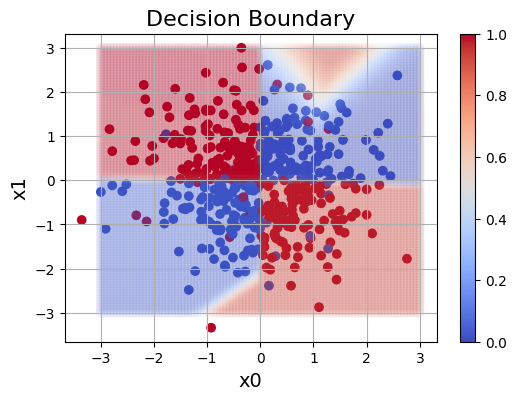

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.colorbar()

# Create Meshgrid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x0, x1 = np.meshgrid(x, y)
x0 = x0.flatten()
x1 = x1.flatten()
xor = x0 * x1
data = np.stack([x0, x1], axis=1)

preds = model.predict(data)
preds = preds.flatten()

plt.scatter(x0, x1, c=preds, cmap='coolwarm', alpha=0.05)
plt.title('Decision Boundary', fontsize=16)
plt.show()

### Which optimizer did you choose? Discuss the differences between SGD and Adam.
I tried both SGD and Adam and ultimately chose Adam because it consistently delivered higher test accuracy (above 0.92).

SGD updates all weights with the same learning rate based on mini-batch gradients, so it requires careful tuning and benefits a lot from schedules like my warmup + cosine decay. Adam adapts the learning rate per parameter by keeping moving averages of the gradients and their squares (first and second moments), which made training more stable and faster to a good solution on this task. While SGD with a scheduler was competitive, Adam was the most reliable path to surpass the accuracy target.


### Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?


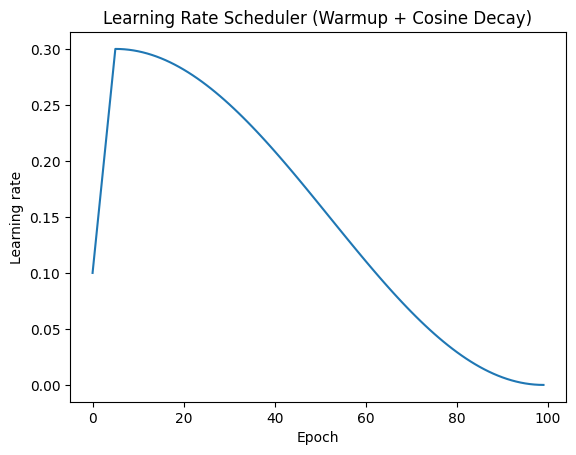

In [12]:
learning_rates = [lr_scheduler(epoch) for epoch in range(epochs)]

plt.plot(range(epochs), learning_rates)
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.title("Learning Rate Scheduler (Warmup + Cosine Decay)")
plt.show()

### Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.
**SGD vs ADAM**
 
I will start by comparing the difference in performance between SGD and Adam with respects to using learning rate scheduling versus a fixed learning rate. The fixed learning rate is set to 0.01

| LR strategy         | SGD (test acc) | Adam (test acc) |
|---------------------|---------------:|----------------:|
| With LR scheduling  | 0.91           | 0.93            |
| Fixed learning rate | 0.83           | 0.91            |

These results confirms what was discussed earlier: SGD gains more from using a learning scheduler than Adam does.

**Model architectuer**

I also experimented with the model architecure.
My first attempt at the problem was with a single hidden layer consisting of 2 nodes. Since it's the XOR problem the MLP should in theory be able to reach 100% accuracy with this architecture. If $a_1=NOT(AND(x1, x0))$, $a_2=OR(x1, x0)$ and $y = AND(a_1, a_2)$. However this only gives an test accuracy of 0.68 with the current implementation (LR scheduling + Adam). Thus i scratched the idea and tried a different approach. I tried with 2 hidden layers consisting of 10 nodes in each, this gave an accuracy of 0.73. After experimenting more i landed on 2 hidden layers, where the first consist of 8 nodes and the second of 16, this gave me the ultimate result of 0.93 test accuracy





# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [13]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [14]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


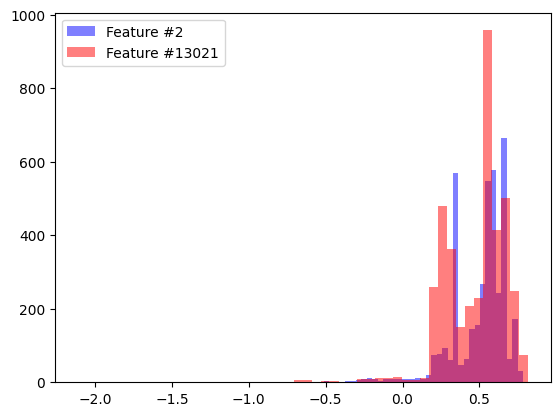

In [15]:
# Features seem to be similarly distributed...
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

In [16]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


# My solution

## Preprocessing

In [ ]:
# Set a random seed
seed = 42
random.seed(seed)

# Reread the data without ID column
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
data.columns = data.columns.astype(str)


## Dimensionality Reduction 
I will document my solution to this mission from this point on. Based on the hints in the mission description it seems like mindlessly clustering won't work. I will start by trying out PCA in 2D to see if this reduces the dimensions while preversing an adequate amount of the total variance in the original data.

### PCA - 2D

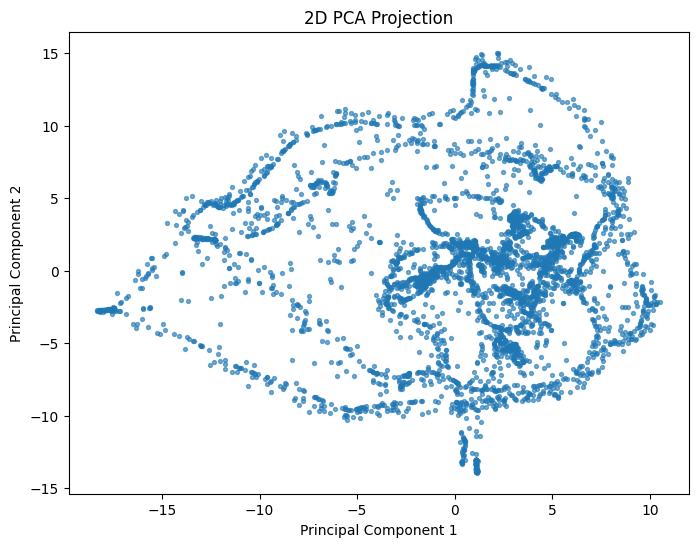

In [159]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=seed)
X_pca = pca.fit_transform(data)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# --- 2D Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=8, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()


In [85]:
print(pca.explained_variance_ratio_.sum())

0.10621860628822288


This tells me that the first two principal components together explain only 10.6% percent of the total variance in the original data. Which is not a lot. The plot also suggests that the data has a **nonlinear** relationship since it looks like the data has a spiral type pattern. PCA is linear so it makes sense that the variance ratio is so low. So now I will try nonlinear dimensionality reduction techniques. I will try t-SNE first.

### t-SNE - 2D

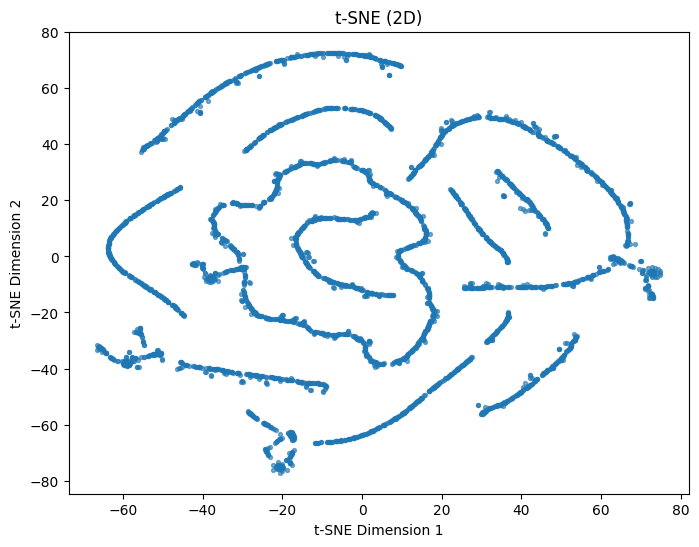

In [ ]:
from sklearn.manifold import TSNE

tsne_2d = TSNE(n_components=2, random_state=seed)
X_tsne_2d = tsne_2d.fit_transform(data)

tsne_2d_df = pd.DataFrame(X_tsne_2d, columns=['Dim1', 'Dim2'])

# --- 2D Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(tsne_2d_df['Dim1'], tsne_2d_df['Dim2'], s=8, alpha=0.6)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE (2D)')
plt.show()



### t-SNE - 3D

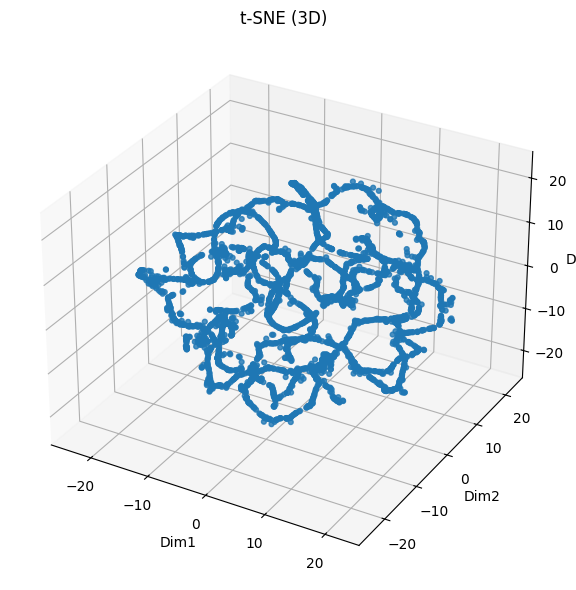

In [88]:
tsne_3d = TSNE(n_components=3, random_state=seed)
X_tsne_3d = tsne_3d.fit_transform(data)

tsne_3d_df = pd.DataFrame(X_tsne_3d, columns=['Dim1', 'Dim2', 'Dim3'])

# Basic 3D scatter (no labels)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    tsne_3d_df['Dim1'].values,
    tsne_3d_df['Dim2'].values,
    tsne_3d_df['Dim3'].values,
    s=12,
    alpha=0.8
)

ax.set_title('t-SNE (3D)')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')
plt.tight_layout()
plt.show()

## DBSCAN Clustering

Clusters found: 4
Noise points: 0


Text(0.5, 0, 'Dim3')

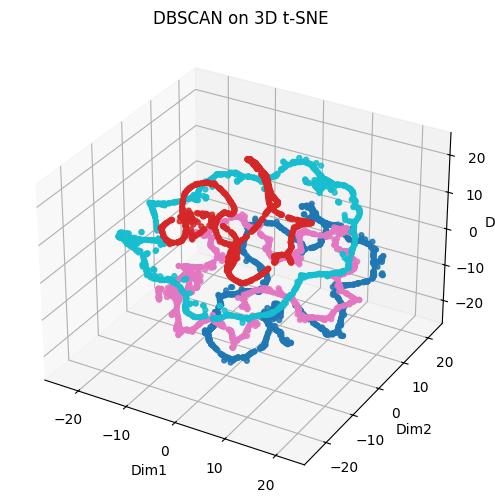

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=4)
db_labels = dbscan.fit_predict(tsne_3d_df)

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)
print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_3d_df['Dim1'],
    tsne_3d_df['Dim2'],
    tsne_3d_df['Dim3'],
    c=db_labels,
    cmap='tab10',
    s=12,
    alpha=0.85
)

ax.set_title('DBSCAN on 3D t-SNE')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')


## Generate submission file for Kaggle

In [ ]:
ids = np.arange(len(db_labels))

submission_db = pd.DataFrame({'ID': ids, 'cluster': db_labels})

submission_db.to_csv('submission.csv', index=False)

This submission achieved 100% clustering accuracy on kaggle


# Discussion

### **Dimensionality Reduction**

**Which dimensionality reduction methods helped you determine the correct number of clusters?**

The method that helped me determine the correct number of clusters was t-SNE. After trying multiple dimensionality reduction techniques, t-SNE produced a clear and well-separated visualization of the data, where the clusters were distinctly visible. This made it possible to accurately estimate the number of clusters and achieve 100% clustering accuracy.

**Why did some methods work better than others?**

Some methods worked better because the dataset turned out to have non-linear relationships between its features. Linear methods like PCA could not effectively capture this complexity, leading to overlapping or poorly separated clusters in the reduced space. Non-linear methods such as t-SNE, on the other hand, are designed to preserve local neighborhood relationships, allowing them to uncover curved or manifold-like structures in the data. This is why t-SNE outperformed PCA in my case.

**Explain the differences between PCA, t-SNE, and UMAP.**

Principal Component Analysis (PCA) is a linear dimensionality reduction method. It projects the data onto orthogonal axes that capture the most variance but cannot model complex, non-linear patterns.

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear method that focuses on preserving local similarities between points. It is highly effective for visualizing clusters but does not preserve global distances well.

Uniform Manifold Approximation and Projection is also non-linear, combining both local and global structure preservation. It’s faster and often scales better than t-SNE, though in this case t-SNE produced clearer separation for my dataset.


### **Clustering Approach**

**Which clustering algorithm and hyperparameters did you use?**

The clustering algorithm i used was DBSCAN with the hyperparameters $\epsilon=3$ and $min\_samples=4$. By calculating the number of clusters and noise points, i found that these hyperparameters produced 4 clusters and 0 noise points. This meant that every data point was successfully assigned to a cluster.

**Discuss the differences between algorithms like KMeans and DBSCAN**

KMeans partitions the data into a predefined number of clusters (k) by minimizing the distance between points and their cluster centroids. It assumes clusters are roughly spherical and similar in size. KMeans is sensitive to outliers and requires the number of clusters to be chosen in advance.

DBSCAN, in contrast, is a density-based algorithm. It groups together points that are closely packed and labels low-density points as noise. It does not require specifying the number of clusters beforehand and can find clusters of arbitrary shapes.

### **Data Type Analysis**

**What is the hidden data type in the dataset?**

Each row contains 16,384 numeric values, which can be reshaped into a 128×128 matrix. When visualized, these matrices form grayscale images. This means each data point is essentially one image that has been flattened into a long 1-dimensional vector. The task description mentioned that the data was obfuscated, and by sorting the column names in ascending order (from col_0 to col_16383), I was able to reconstruct the original image structure correctly.

**How does this information influence feature extraction for clustering?**

Knowing the data is made up of images changes how we look for patterns.

The numbers in each row are not random — they are pixels that are connected to each other. This means nearby pixels in the grid often form shapes or patterns that matter much more than individual pixel values.
So, instead of treating every pixel as completely separate, we should use methods that can find overall patterns in the images, like brightness areas or edges. This makes clustering work better because it focuses on image structure instead of random pixel differences.

**Can it explain why some dimensionality reduction algorithms are more effective?**

Yes. Since image data is complex, linear methods like PCA can’t capture what really makes two images similar or different. PCA only works well when data changes in simple and linear ways.
t-SNE and UMAP work better because they can handle non-linear patterns, meaning they keep track of which images look alike even if the relationships are complicated. That’s why t-SNE gave clear and separate clusters, while PCA showed more overlapping points.

### **Server Locations**

In [114]:
data_full = pd.read_csv("unsupervised_data.csv")

cols = data_full.columns

#Sort the columns in increasing order (based on col_x)
sorted_cols = sorted(cols, key=lambda x: int(x.split('_')[1]))

df = data_full[sorted_cols]


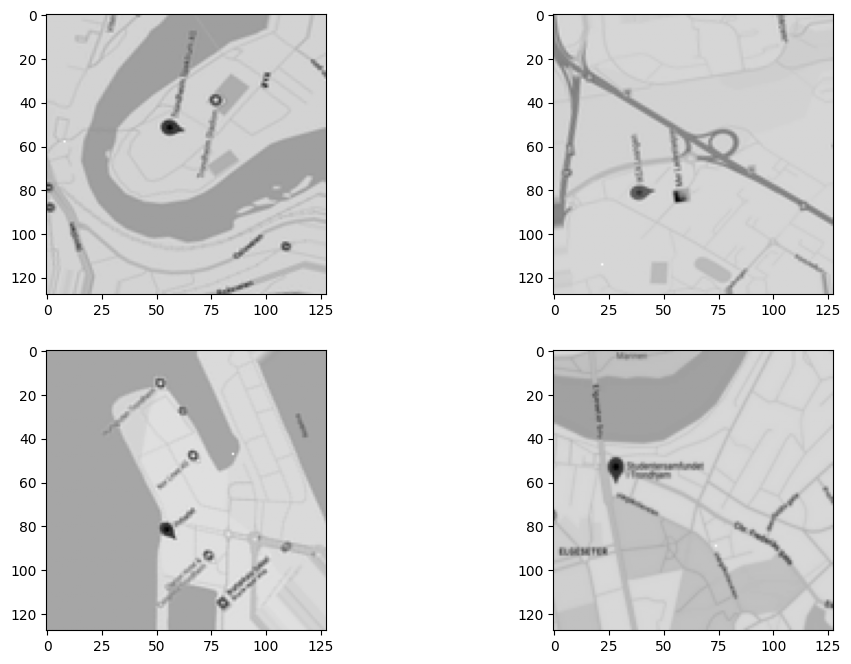

In [161]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()


loc_1 = df.iloc[0].to_numpy()
loc_2 = df.iloc[1].to_numpy()
loc_3 = df.iloc[13].to_numpy()
loc_4 = df.iloc[24].to_numpy()

image_1 = loc_1.reshape(128, 128)
image_2 = loc_2.reshape(128, 128)
image_3 = loc_3.reshape(128, 128)
image_4 = loc_4.reshape(128, 128)

axes[0].imshow(image_1, cmap='gray')
axes[1].imshow(image_2, cmap='gray')
axes[2].imshow(image_3, cmap='gray')
axes[3].imshow(image_4, cmap='gray')

By looking at the images i can deduce that the four server locations from top-left to bottom-right are:
- Trondheim Spektrum
- IKEA Leangen
- Pirbadet
- Studentersamfundet


---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [40]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [41]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [42]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [43]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)